In [29]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 20.4 MB/s eta 0:00:00


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency, f_oneway

!matplotlib inline

zsh:1: command not found: matplotlib


In [73]:
DATASET_LOC = '../data/'
prepared_data_file = 'prepared_data.parquet'
df = pd.read_parquet(os.path.join(DATASET_LOC,prepared_data_file))

In [74]:
#Check if there is null data
df.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
transaction_date         0
transaction_year         0
transaction_month        0
transaction_day          0
transaction_hour         0
dtype: int64

In [75]:
df = df[df['transaction_year']==2019]
df = df[df['transaction_month']==1]
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95,2019-01-01,2019,1,1,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30,2019-01-01,2019,1,1,0
7,2019-01-01 00:21:28,2019-01-01 00:28:37,1.0,1.3,1.0,163,229,1,9.05,2019-01-01,2019,1,1,0
8,2019-01-01 00:32:01,2019-01-01 00:45:39,1.0,3.7,1.0,229,7,1,18.50,2019-01-01,2019,1,1,0
9,2019-01-01 00:57:32,2019-01-01 01:09:32,2.0,2.1,1.0,141,234,1,13.00,2019-01-01,2019,1,1,0


In [76]:
categorical_columns = ['PULocationID','transaction_date','transaction_month','transaction_day','transaction_hour']
numerical_columns = ['trip_distance','total_amount']
all_needed_columns = categorical_columns + numerical_columns

In [77]:
df = df[all_needed_columns]
print(df.shape)
df.head()

(7659111, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,151,2019-01-01,1,1,0,1.5,9.95
1,239,2019-01-01,1,1,0,2.6,16.30
7,163,2019-01-01,1,1,0,1.3,9.05
8,229,2019-01-01,1,1,0,3.7,18.50
9,141,2019-01-01,1,1,0,2.1,13.00


In [78]:
df_grouped_by_region = df.groupby(categorical_columns).mean().reset_index()
df_grouped_by_region['count_of_transactions'] = df.groupby(categorical_columns).count().reset_index()['total_amount']
print(df_grouped_by_region.shape)
df_grouped_by_region.head()

(102496, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


In [89]:
categorical_features = ['PULocationID','transaction_month','transaction_day','transaction_hour']
numerical_features = ['trip_distance']
numerical_target = ['total_amount']
all_needed_columns = categorical_features + numerical_features + numerical_target
df = df_grouped_by_region[all_needed_columns]
print(df.shape)
df.head()

(102496, 6)


,PULocationID,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,1,1,1,2,0.0,21.800
1,1,1,1,5,0.0,87.300
2,1,1,1,6,0.0,80.300
3,1,1,1,8,0.0,128.580
4,1,1,1,10,16.9,43.245


<Axes: >

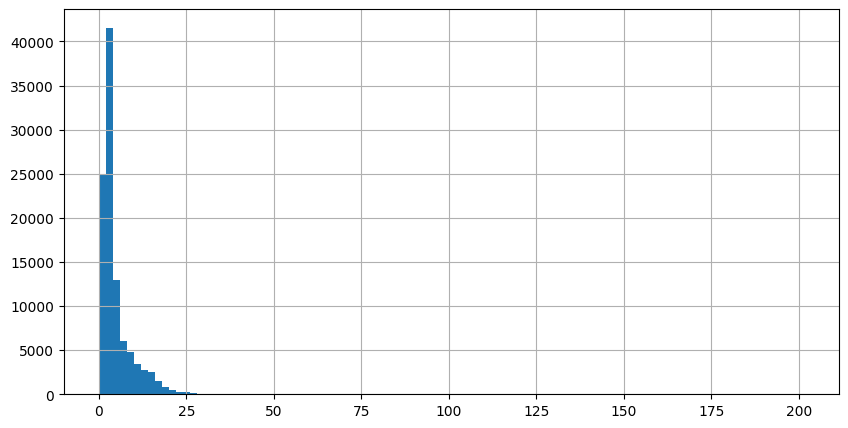

In [90]:
df['trip_distance'].hist(bins=100, figsize=(10,5))

<Axes: >

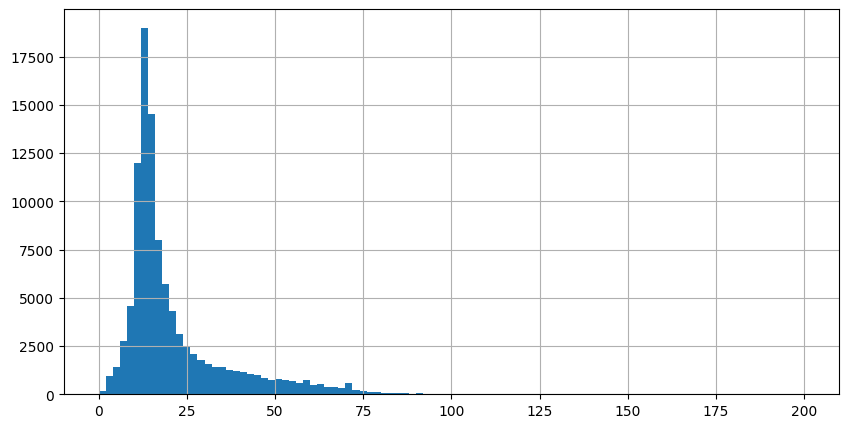

In [91]:
df['total_amount'].hist(bins=100, figsize=(10,5))

In [92]:
df['PULocationID'].value_counts()

PULocationID
107    744
74     744
75     744
79     744
68     744
      ... 
204      3
199      2
176      2
84       1
104      1
Name: count, Length: 263, dtype: int64

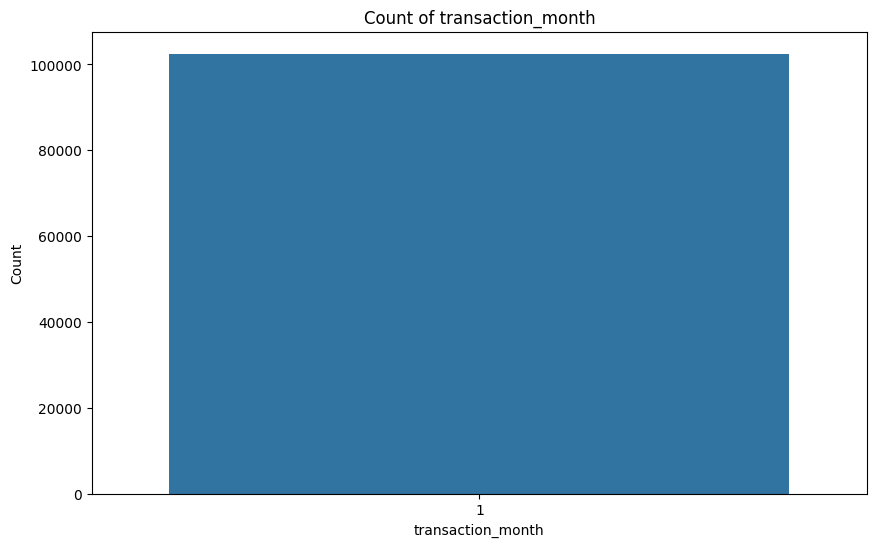

In [93]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='transaction_month')
plt.title(f'Count of transaction_month')
plt.xlabel('transaction_month')
plt.ylabel('Count')
plt.show()

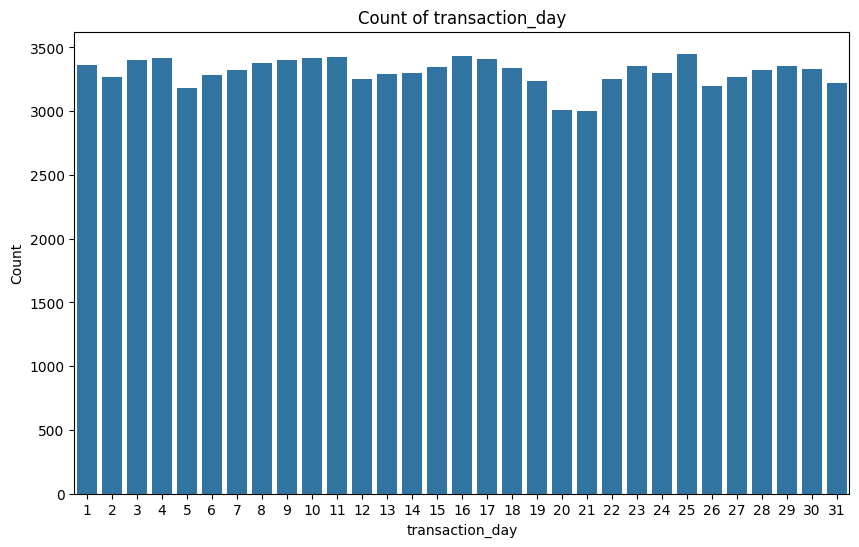

In [94]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='transaction_day')
plt.title(f'Count of transaction_day')
plt.xlabel('transaction_day')
plt.ylabel('Count')
plt.show()

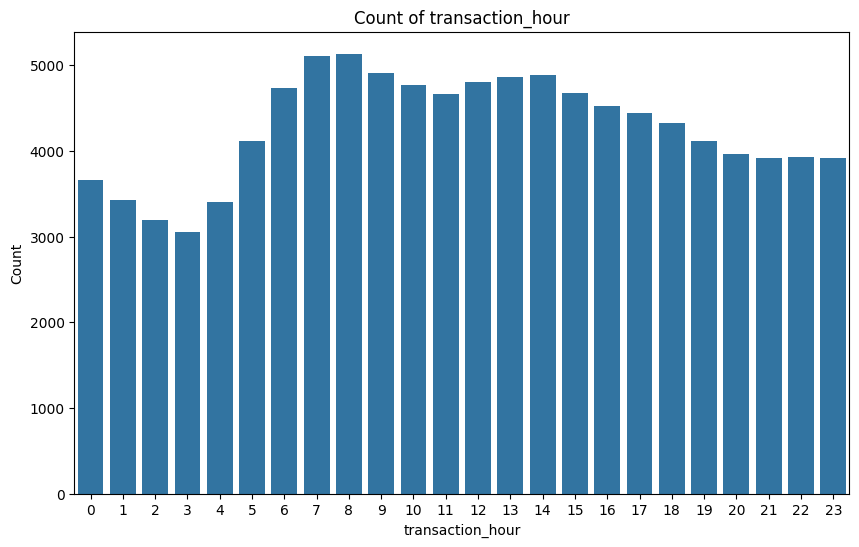

In [95]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='transaction_hour')
plt.title(f'Count of transaction_hour')
plt.xlabel('transaction_hour')
plt.ylabel('Count')
plt.show()

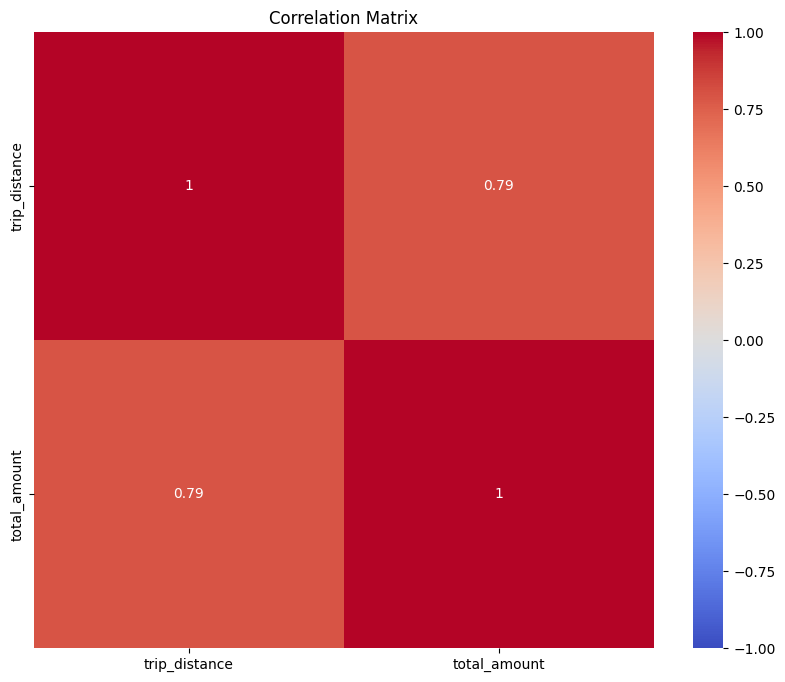

In [96]:
#Pair-wise analysis
correlation_matrix = df[numerical_features+numerical_target].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

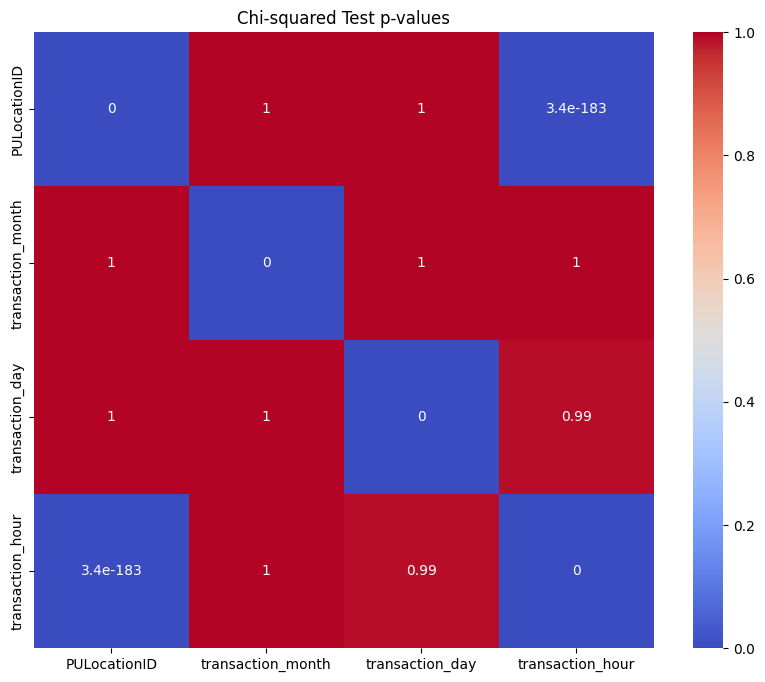

In [97]:
# 2. Chi-squared test among categorical features
chi2_results = np.zeros((len(categorical_features), len(categorical_features)))
for i, feature1 in enumerate(categorical_features):
    for j, feature2 in enumerate(categorical_features):
        if i != j:
            contingency_table = pd.crosstab(df[feature1], df[feature2])
            chi2, p, dof, ex = chi2_contingency(contingency_table)
            chi2_results[i, j] = p

# Plot the chi-squared results
plt.figure(figsize=(10, 8))
sns.heatmap(chi2_results, annot=True, cmap='coolwarm', xticklabels=categorical_features, yticklabels=categorical_features)
plt.title('Chi-squared Test p-values')
plt.show()


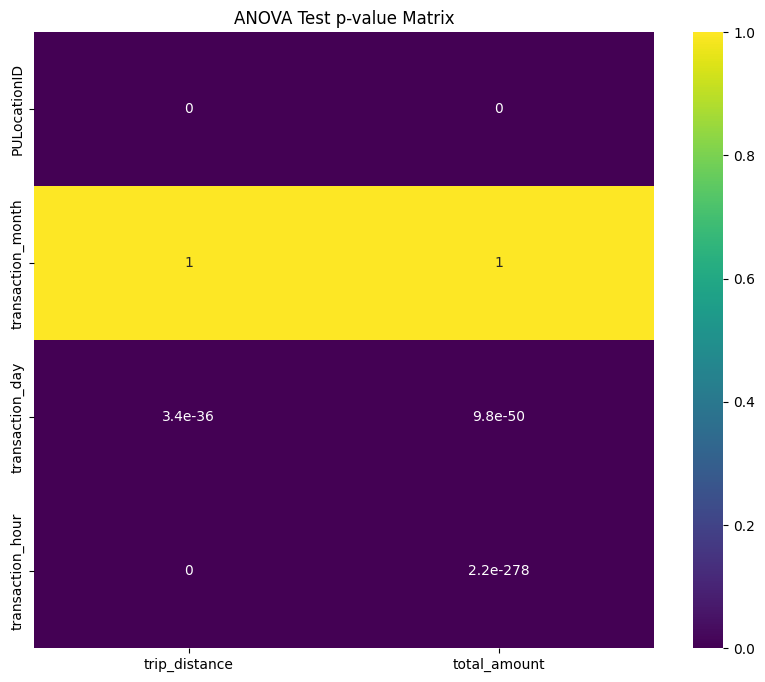

In [100]:
# 3. ANOVA between categorical and numerical features
anova_p_values = np.zeros((len(categorical_features), len(numerical_features) + len(numerical_target)))
for i, cat_feature in enumerate(categorical_features):
    for j, num_feature in enumerate(numerical_features + numerical_target):
        try:
            groups = [df[num_feature][df[cat_feature] == category] for category in df[cat_feature].unique()]
            f_val, p_val = f_oneway(*groups)
            anova_p_values[i, j] = p_val
        except:
            anova_p_values[i, j] = 1

# Plot the ANOVA test p-value matrix
plt.figure(figsize=(10, 8))
sns.heatmap(anova_p_values, annot=True, cmap='viridis', xticklabels=numerical_features + numerical_target, yticklabels=categorical_features)
plt.title('ANOVA Test p-value Matrix')
plt.show()

In [102]:
from sklearn.model_selection import train_test_split

X_bench = df[categorical_features + numerical_features]
y_bench = df[numerical_target]

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)

In [103]:
from sklearn.tree import DecisionTreeRegressor 

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

DecisionTreeRegressor(max_depth=10)

In [104]:
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))

mean_absolute_error 3.4814339622937633
mean_squared_error 70.64970363860492
root_mean_squared_error 8.405337806335027
r2 0.7483359246233738


In [105]:
categorical_features_benchmark = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_features_benchmark  = categorical_features_benchmark
target_feature_benchmark  = 'total_amount'

# Train and test split
from sklearn.model_selection import train_test_split

X_bench = df[input_features_benchmark]
y_bench = df[target_feature_benchmark]

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)

# Fit a model
from sklearn.tree import DecisionTreeRegressor 

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

# Evaluate model
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))

mean_absolute_error 8.46515396594813
mean_squared_error 193.48750476632674
root_mean_squared_error 13.90997860409306
r2 0.3107705839357472
